In [92]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
from pandas.api.types import CategoricalDtype
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [93]:
#Diamonds Prices2022
data = pd.read_csv('C:/Users/2001_/Desktop/고은서/2023-1/DAT/프로젝트/Diamonds Prices2022.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [94]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [123]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
# convert cut, color, and clarity into ordered categorical types
data_category = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

ordered_cut = pd.api.types.CategoricalDtype(ordered = True, categories = data_category['cut'])
data['cut'] = data['cut'].astype(ordered_cut)
ordered_color = pd.api.types.CategoricalDtype(ordered = True, categories = data_category['color'])
data['color'] = data['color'].astype(ordered_color)
ordered_clarity = pd.api.types.CategoricalDtype(ordered = True, categories = data_category['clarity'])
data['clarity'] = data['clarity'].astype(ordered_clarity)

In [7]:
data.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [8]:
data.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


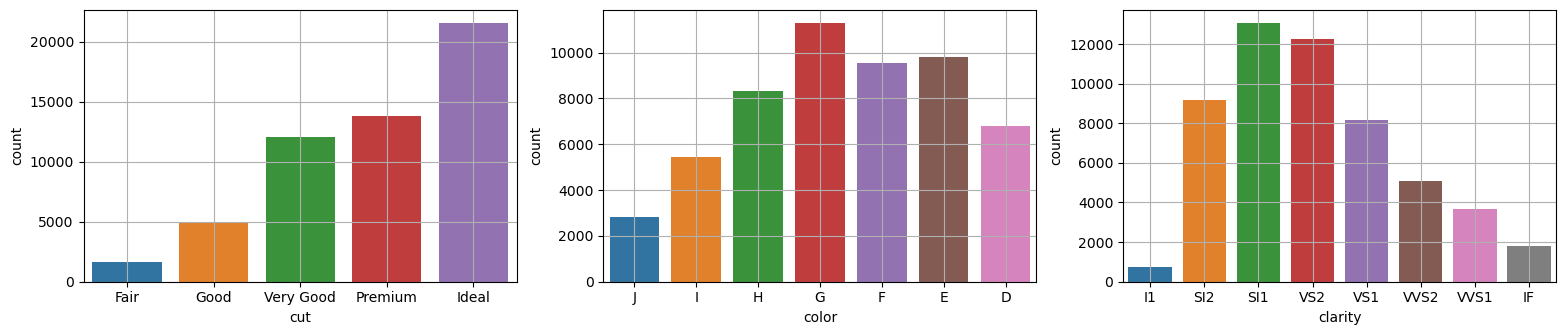

In [41]:
plt.figure(figsize=(19, 12))

   
ax1 = plt.subplot(3, 3, 1)
sns.countplot(x=data['cut'].sort_values())
#plt.grid()

ax2 = plt.subplot(3, 3, 2)
sns.countplot(x=data['color'].sort_values())
#plt.grid()

ax3 = plt.subplot(3, 3, 3)
sns.countplot(x=data['clarity'].sort_values())
#plt.grid()

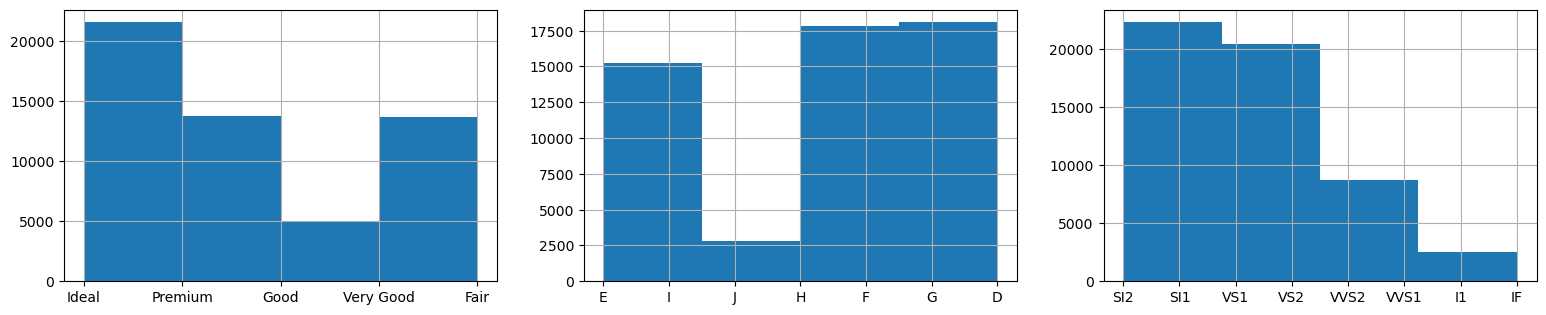

In [58]:
plt.figure(figsize=(19, 12))
ax1 = plt.subplot(3, 3, 1)
plt.hist(data['cut'],bins=4)

plt.grid()

ax2 = plt.subplot(3, 3, 2)
plt.hist(data['color'],bins=4)

plt.grid()


ax3 = plt.subplot(3, 3, 3)
plt.hist(data['clarity'],bins=4)

plt.grid()


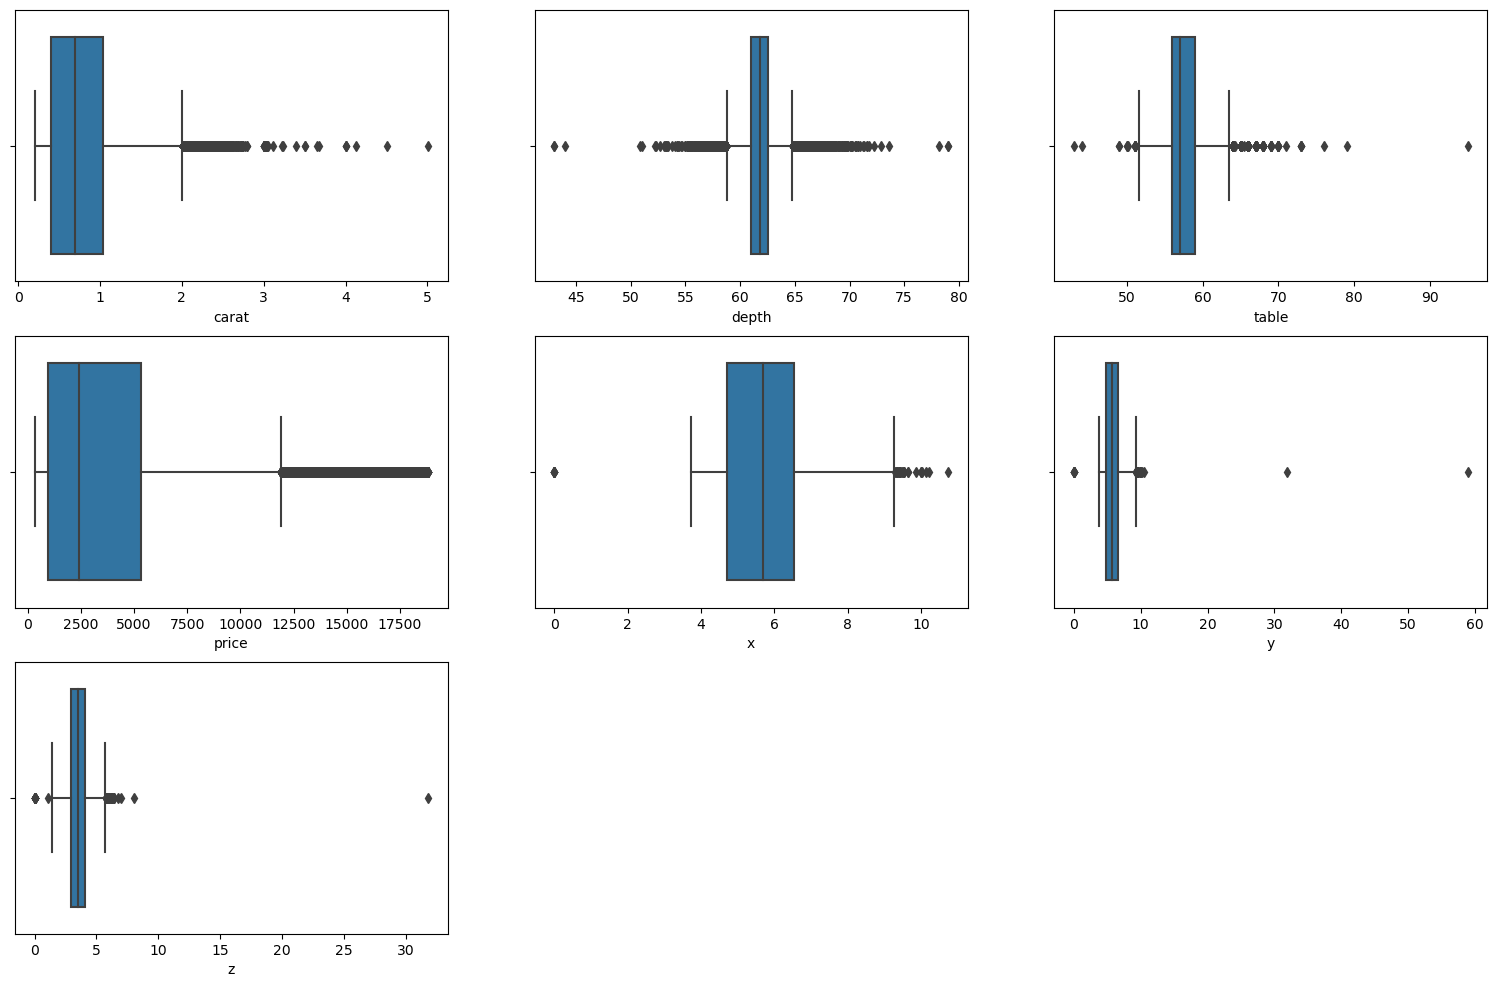

In [10]:
num_cols = data.select_dtypes('number')
i = 1
plt.figure(figsize=(19, 12))
for c in num_cols.columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[c])
    i+=1

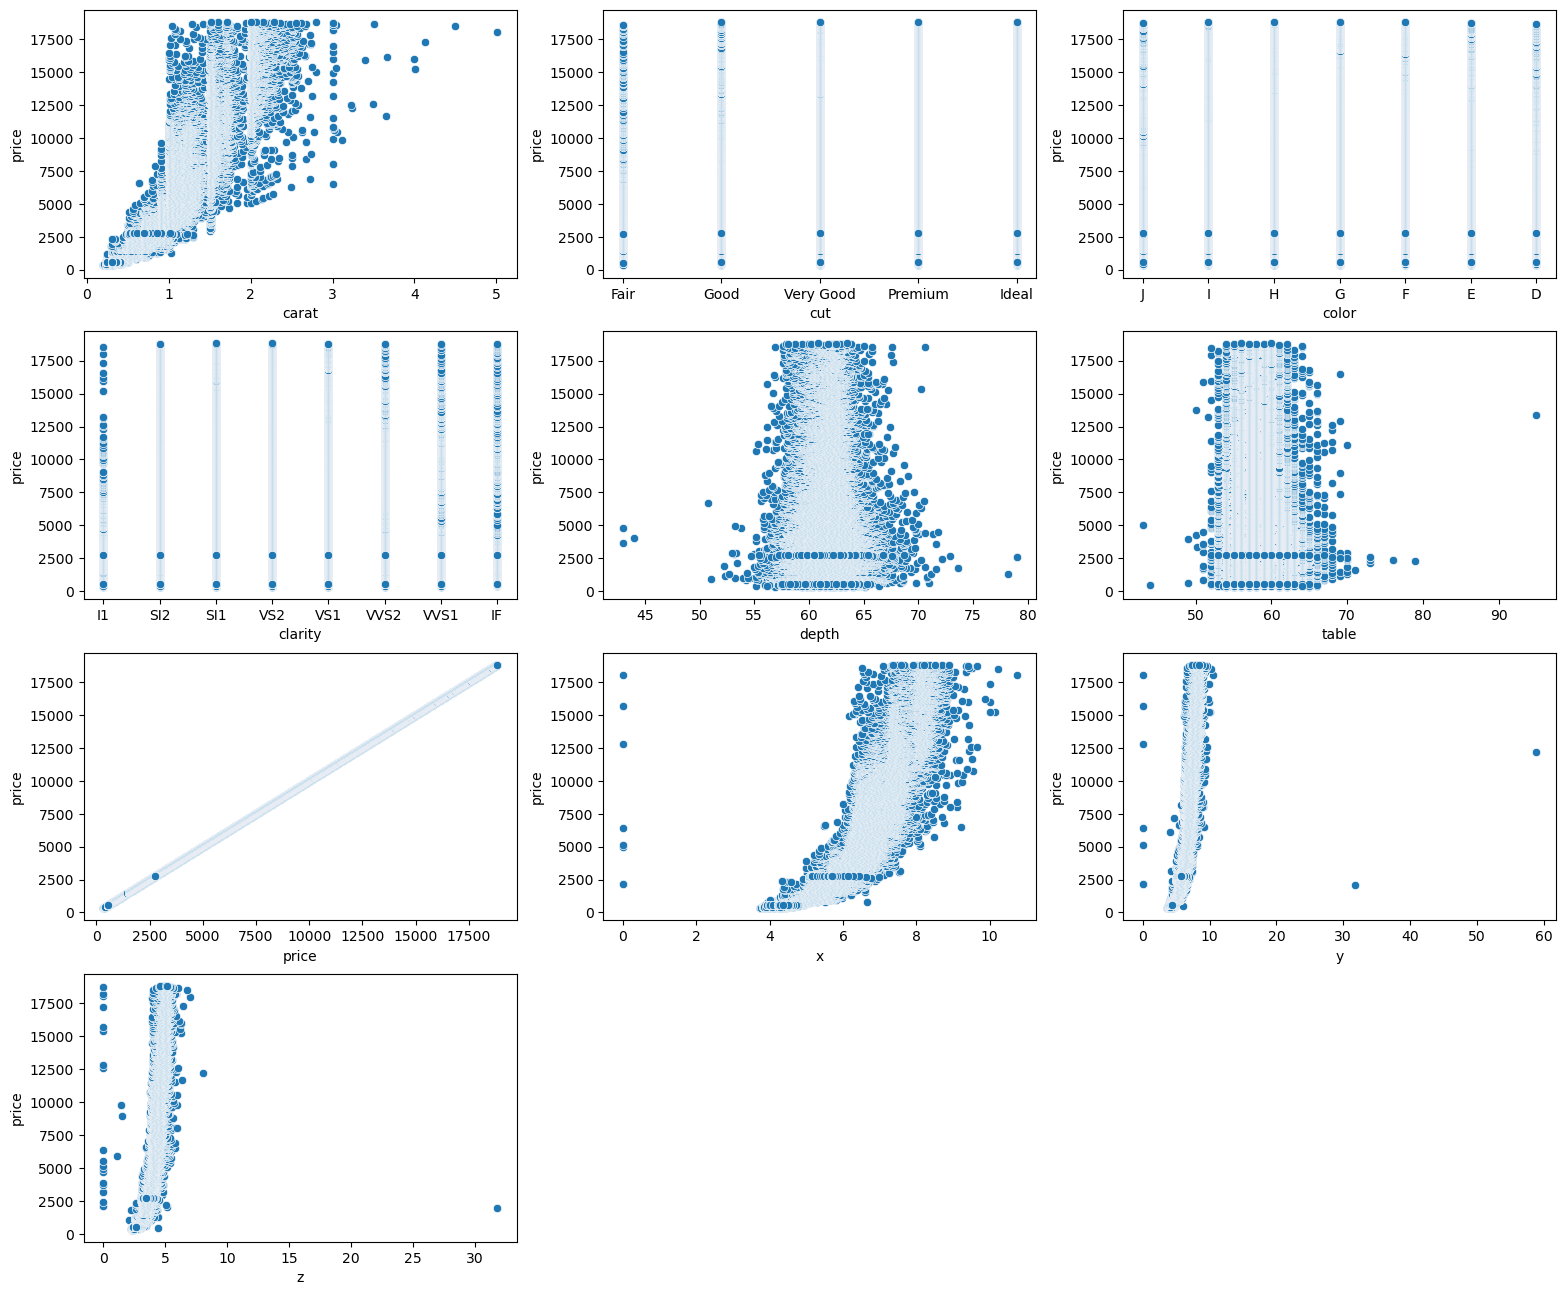

In [11]:
i = 1
plt.figure(figsize=(19, 16))
for c in data.columns:
    plt.subplot(4, 3, i)
    sns.scatterplot(x=data[c], y=data['price'])
    i+=1

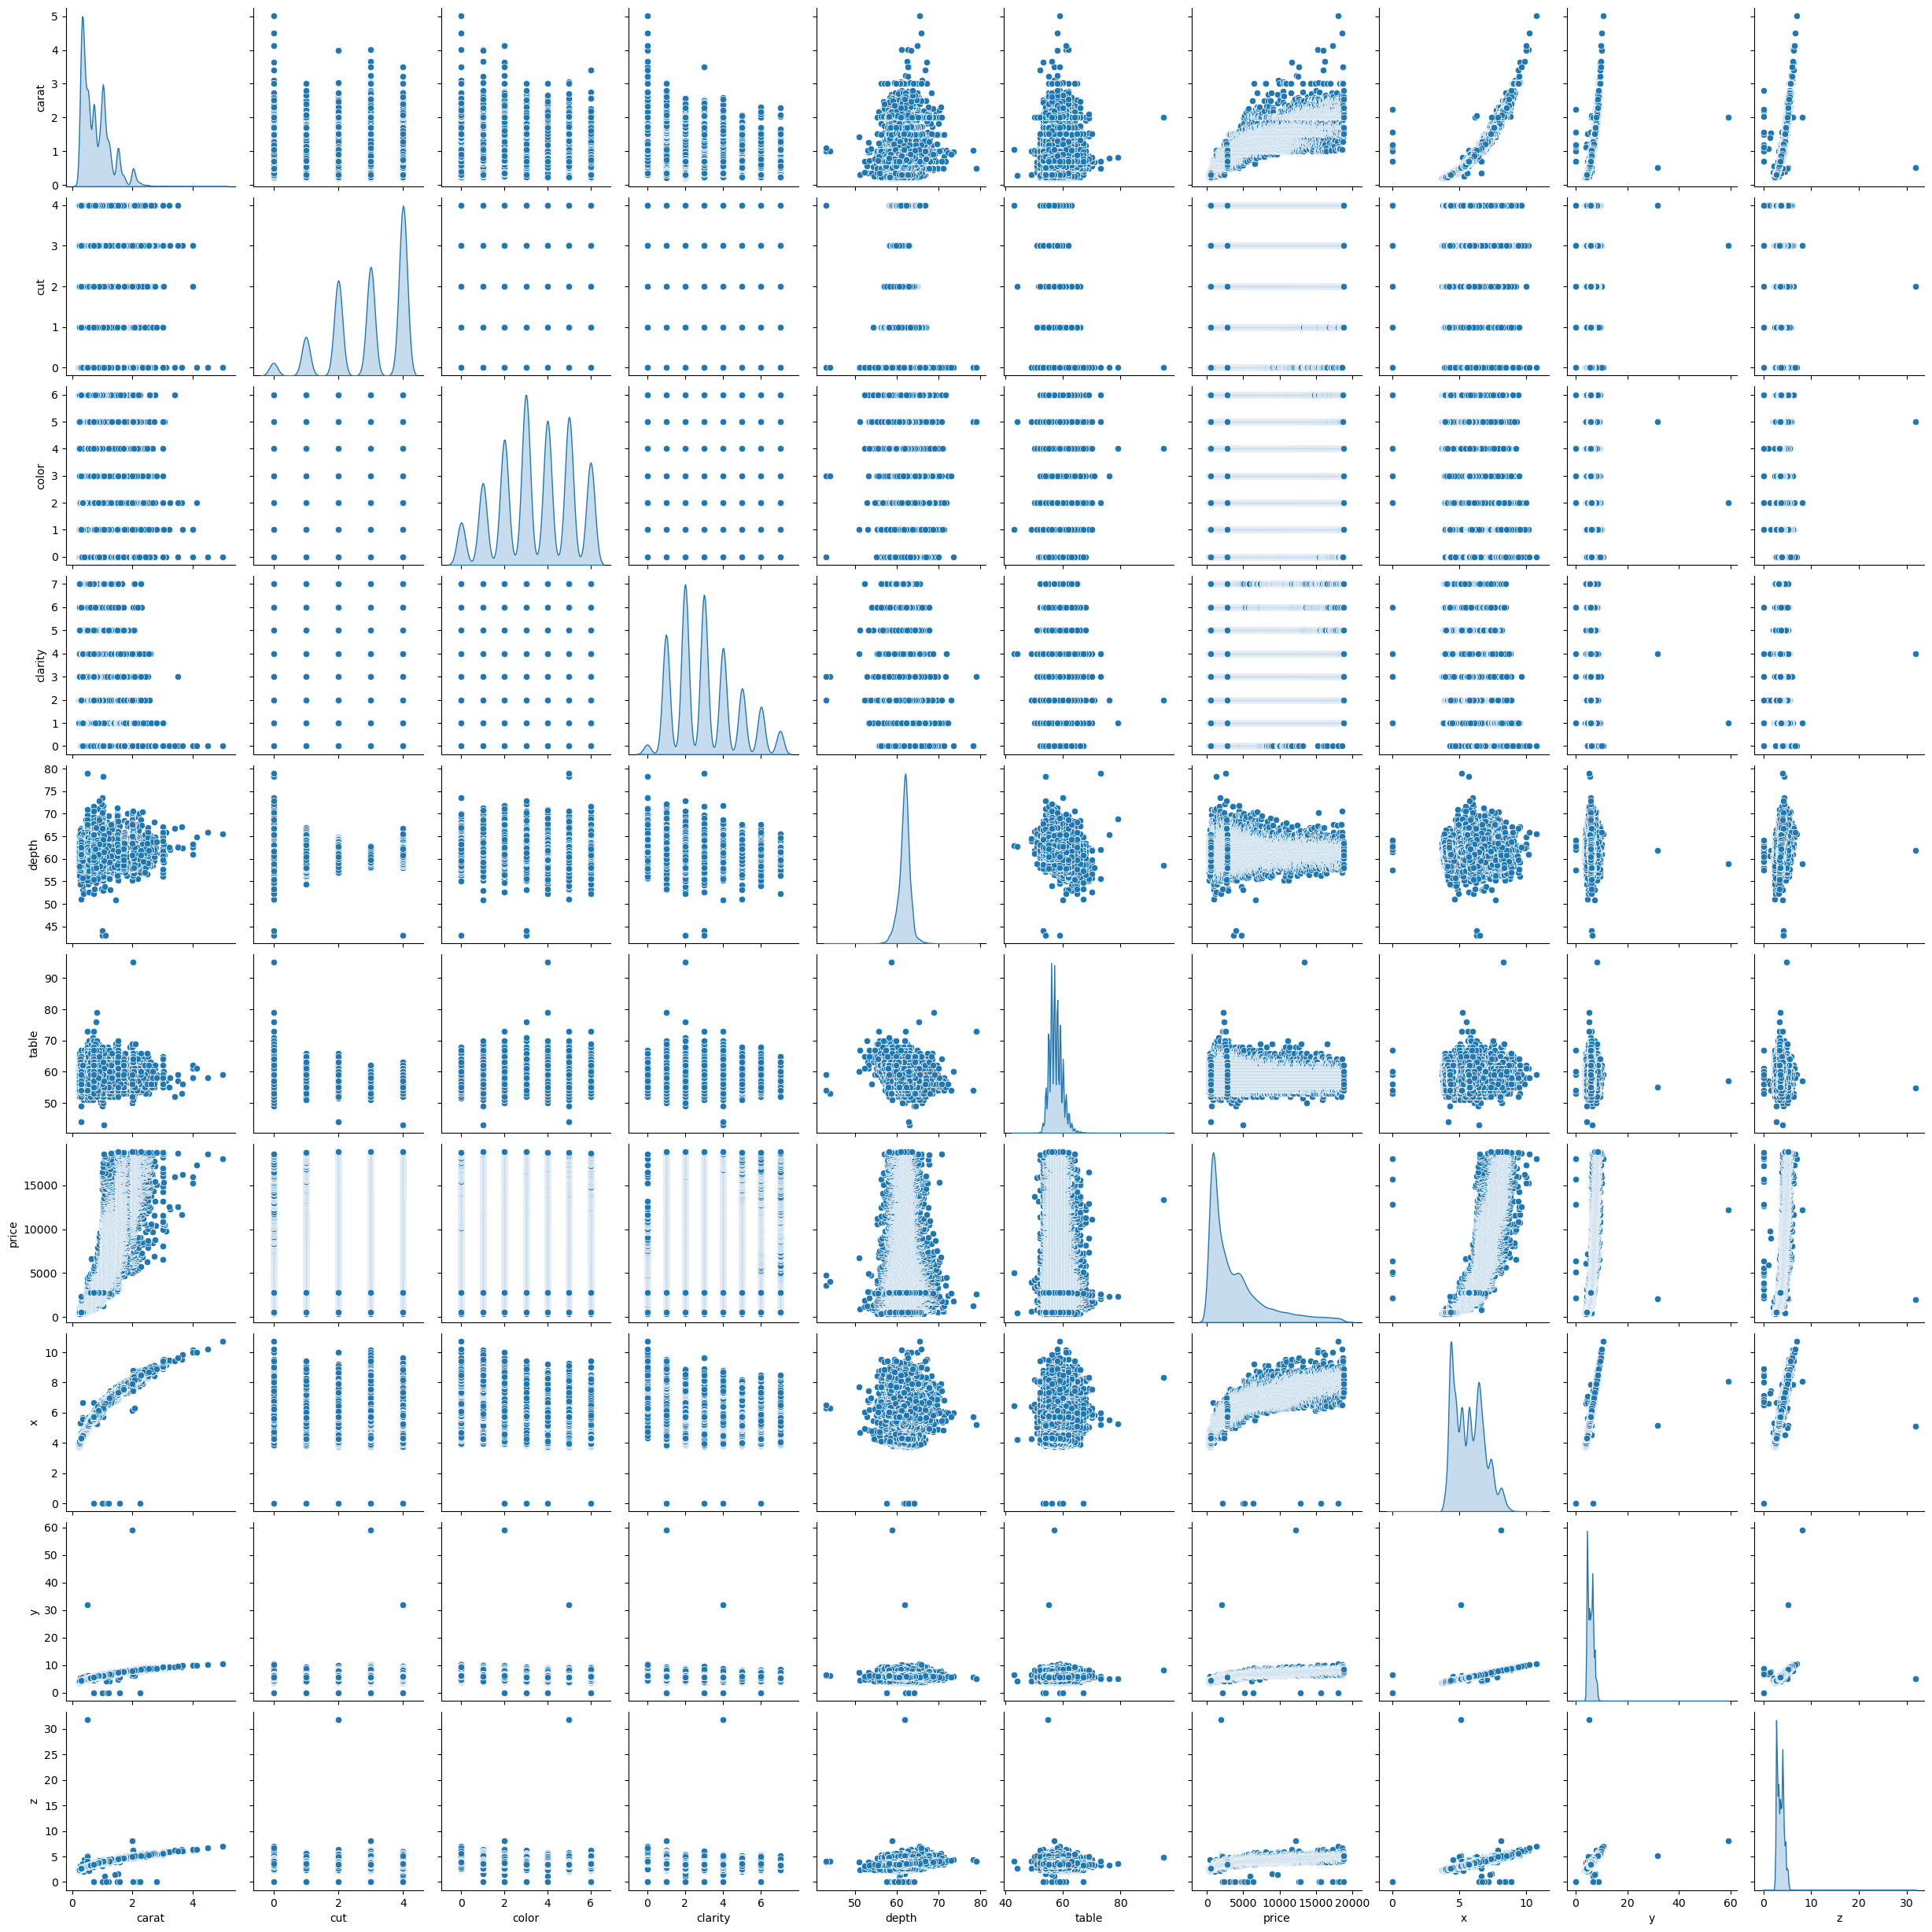

In [124]:
#pairgrid = sns.pairplot(data)

sns.pairplot(data, diag_kind='kde')

In [59]:
data_corr = data.corr()
data_corr

C:\Users\2001_\AppData\Local\Temp\ipykernel_68\3546755688.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = data.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.028234,0.181602,0.921591,0.975093,0.951721,0.953387
depth,0.028234,1.000000,-0.295798,-0.010630,-0.025289,-0.029340,0.094927
table,0.181602,-0.295798,1.000000,0.127118,0.195333,0.183750,0.150915
price,0.921591,-0.010630,0.127118,1.000000,0.884433,0.865419,0.861249
x,0.975093,-0.025289,0.195333,0.884433,1.000000,0.974701,0.970771
y,0.951721,-0.029340,0.183750,0.865419,0.974701,1.000000,0.952005
z,0.953387,0.094927,0.150915,0.861249,0.970771,0.952005,1.000000


C:\Users\2001_\AppData\Local\Temp\ipykernel_68\704096953.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='YlGnBu',linewidth=0.01, annot_kws={'size': 6});


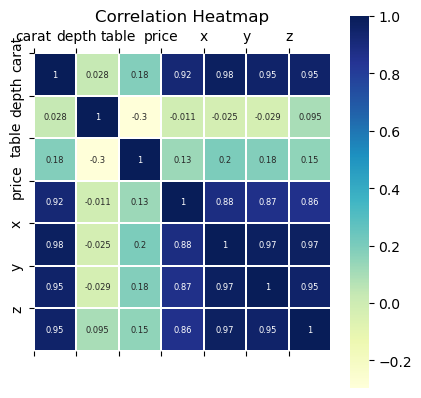

In [60]:
plt.matshow(data_corr)
#plt.matshow(df_corr, cmap='hot')
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu',linewidth=0.01, annot_kws={'size': 6});
plt.xticks(range(len(data_corr.columns)), data_corr.columns)
plt.yticks(range(len(data_corr.index)), data_corr.index)
plt.title('Correlation Heatmap',fontsize=12,fontweight=5);
#plt.colorbar()

C:\Users\2001_\AppData\Local\Temp\ipykernel_68\3710115534.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='RdBu',linewidth=0.01, annot_kws={'size': 18});


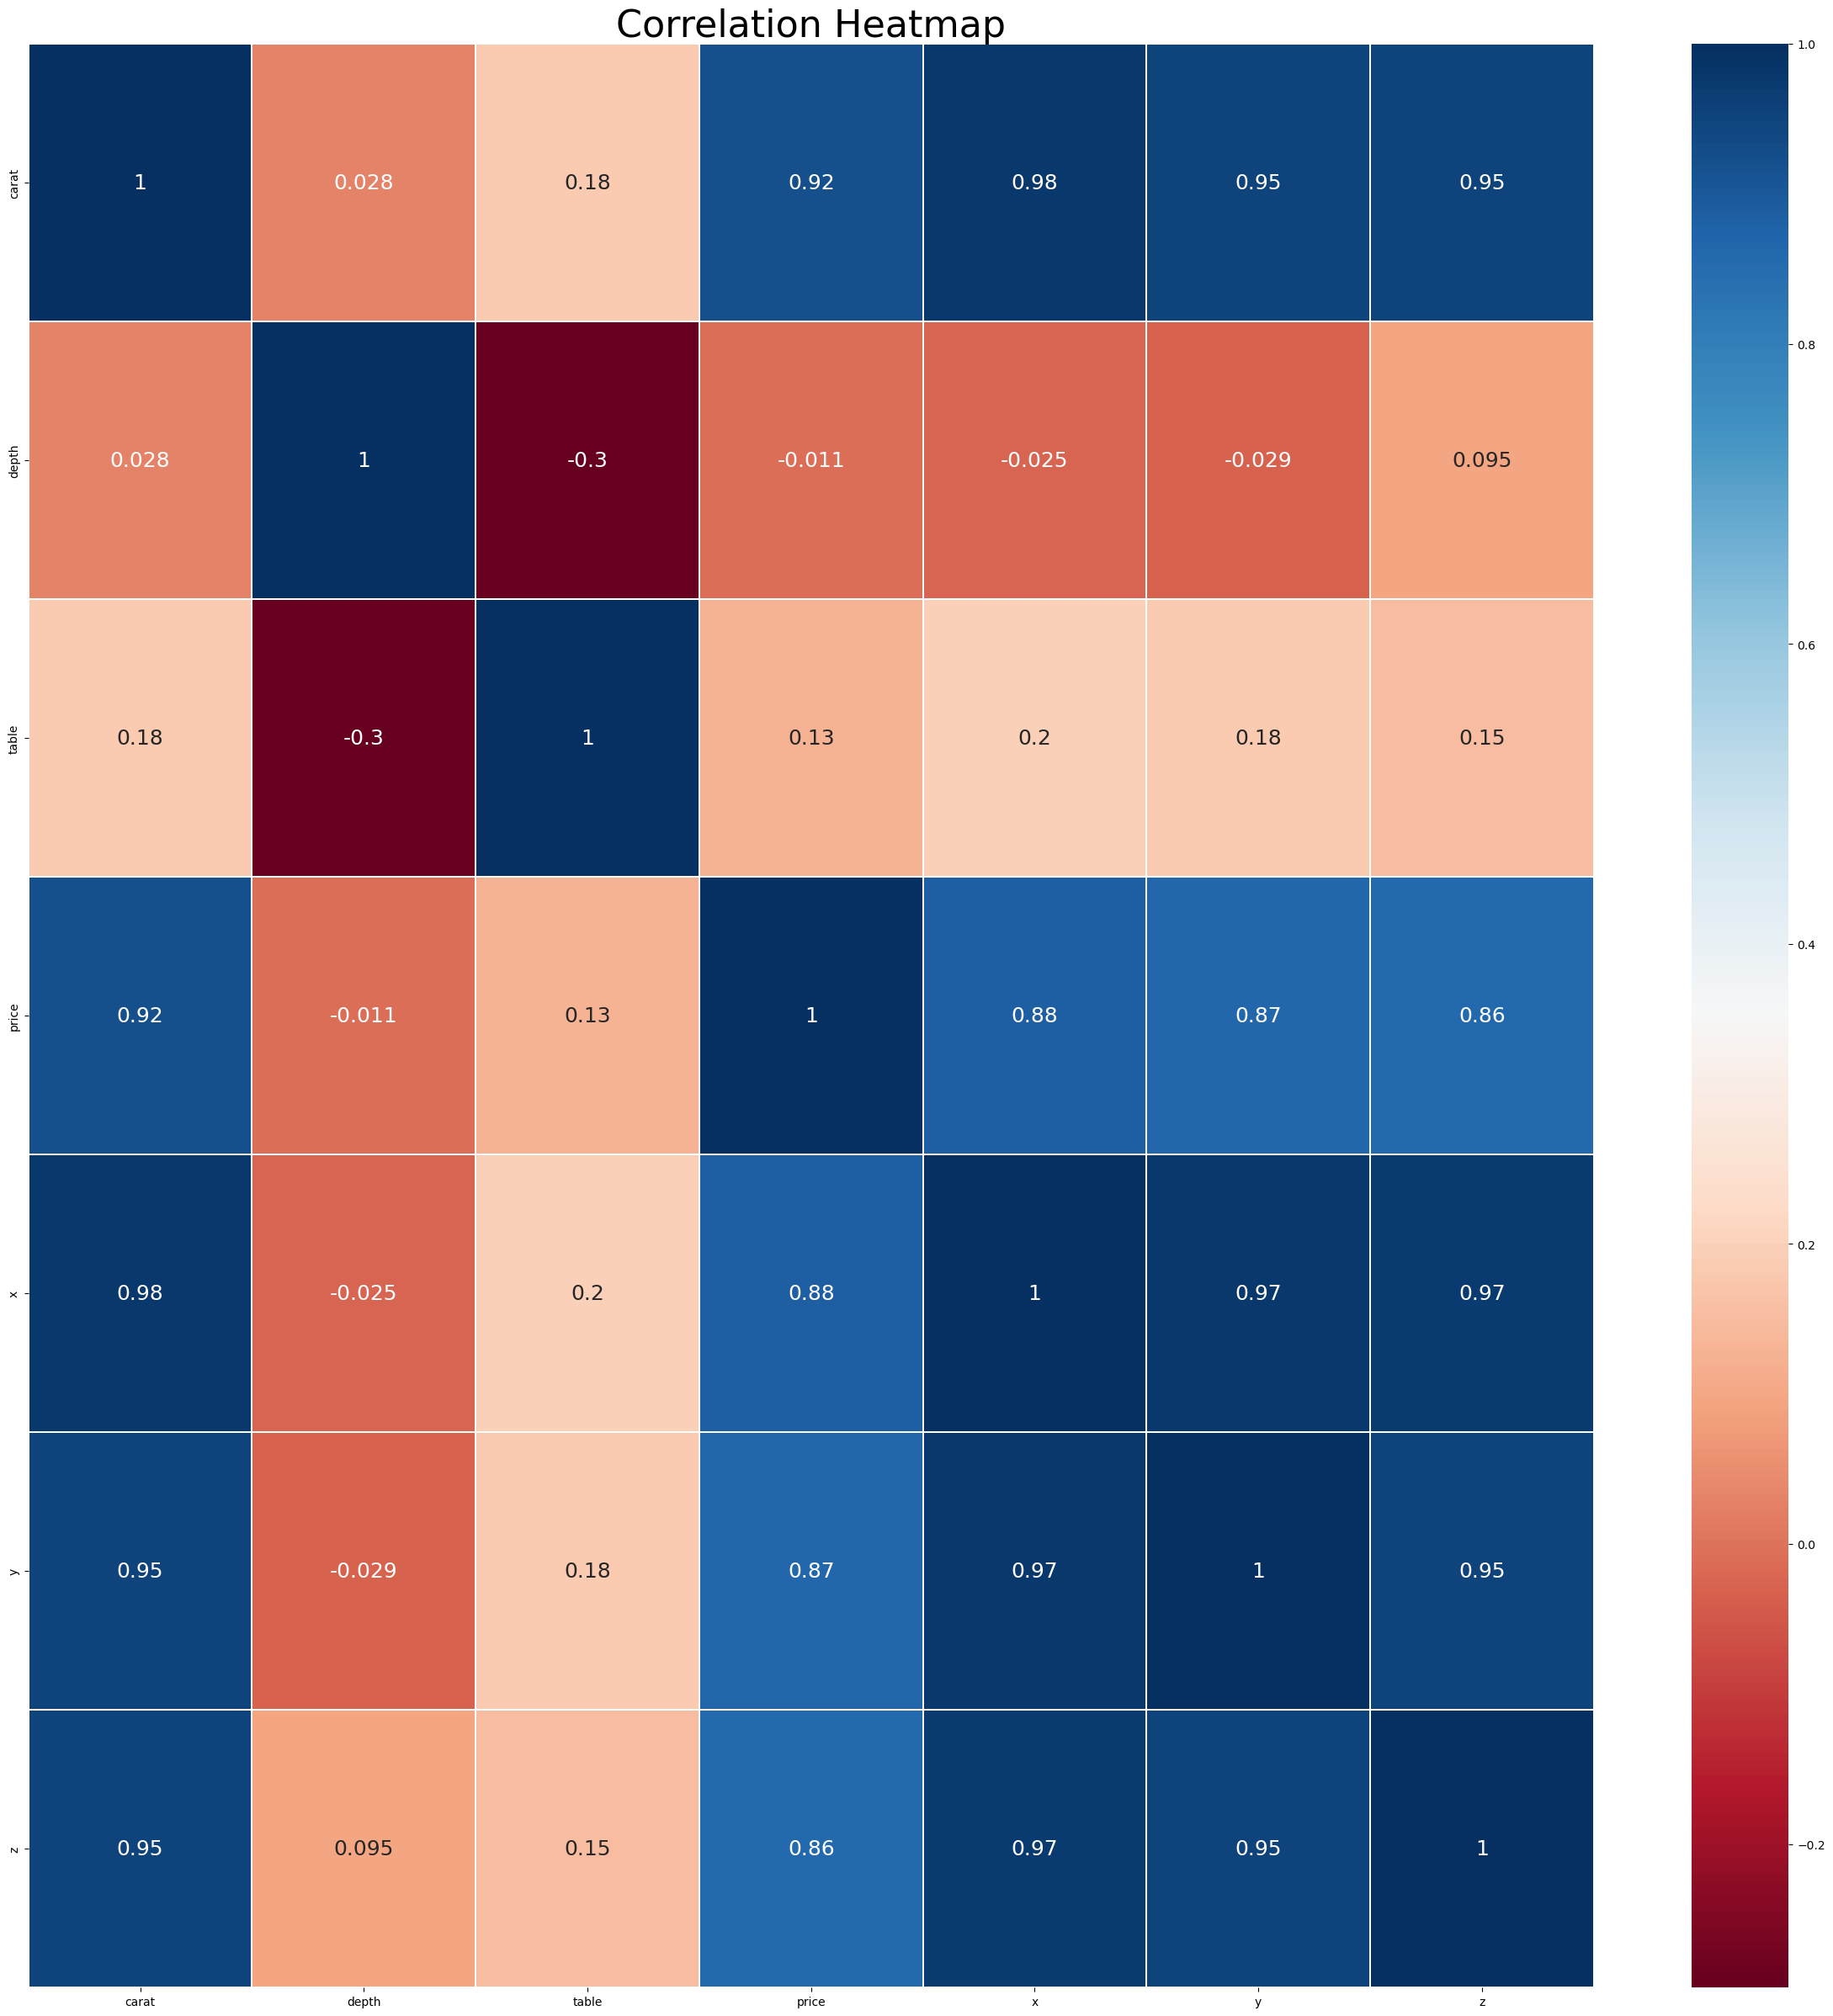

In [61]:
plt.figure(figsize=(30,30));
sns.heatmap(data.corr(),annot=True,cmap='RdBu',linewidth=0.01, annot_kws={'size': 18});
plt.title('Correlation Heatmap',fontsize=32,fontweight=5);

In [95]:
from sklearn.linear_model import LinearRegression # <> Classification
from sklearn import metrics

In [96]:
model = LinearRegression() #모델 설정

In [97]:
data['cut']=np.where(data['cut'] =='Ideal', '4', data['cut'])
data['cut']=np.where(data['cut'] =='Premium', '3', data['cut'])
data['cut']=np.where(data['cut'] =='Very Good', '2', data['cut'])
data['cut']=np.where(data['cut'] =='Good', '1', data['cut'])
data['cut']=np.where(data['cut'] =='Fair', '0', data['cut'])

In [98]:
data['color']=np.where(data['color'] =='D', '6', data['color'])
data['color']=np.where(data['color'] =='E', '5', data['color'])
data['color']=np.where(data['color'] =='F', '4', data['color'])
data['color']=np.where(data['color'] =='G', '3', data['color'])
data['color']=np.where(data['color'] =='H', '2', data['color'])
data['color']=np.where(data['color'] =='I', '1', data['color'])
data['color']=np.where(data['color'] =='J', '0', data['color'])

In [99]:
data['clarity']=np.where(data['clarity'] =='IF', '7', data['clarity'])
data['clarity']=np.where(data['clarity'] =='VVS1', '6', data['clarity'])
data['clarity']=np.where(data['clarity'] =='VVS2', '5', data['clarity'])
data['clarity']=np.where(data['clarity'] =='VS1', '4', data['clarity'])
data['clarity']=np.where(data['clarity'] =='VS2', '3', data['clarity'])
data['clarity']=np.where(data['clarity'] =='SI1', '2', data['clarity'])
data['clarity']=np.where(data['clarity'] =='SI2', '1', data['clarity'])
data['clarity']=np.where(data['clarity'] =='I1', '0', data['clarity'])

In [100]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [101]:
data['cut'] = data['cut'].astype('float64')
data['color'] = data['color'].astype('float64')
data['clarity'] = data['clarity'].astype('float64')

In [102]:
data.dtypes

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [103]:
X = data.drop('price', axis = 1, inplace=False)
y = data['price']

In [104]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,4.0,5.0,1.0,61.5,55.0,3.95,3.98,2.43
1,0.21,3.0,5.0,2.0,59.8,61.0,3.89,3.84,2.31
2,0.23,1.0,5.0,4.0,56.9,65.0,4.05,4.07,2.31
3,0.29,3.0,1.0,3.0,62.4,58.0,4.20,4.23,2.63
4,0.31,1.0,0.0,1.0,63.3,58.0,4.34,4.35,2.75


In [116]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53943.0,0.797935,0.473999,0.2,0.40,0.70,1.04,5.01
cut,53943.0,2.904084,1.116576,0.0,2.00,3.00,4.00,4.00
color,53943.0,3.405873,1.701087,0.0,2.00,3.00,5.00,6.00
clarity,53943.0,3.050980,1.647103,0.0,2.00,3.00,4.00,7.00
depth,53943.0,61.749322,1.432626,43.0,61.00,61.80,62.50,79.00
table,53943.0,57.457251,2.234549,43.0,56.00,57.00,59.00,95.00
price,53943.0,3932.734294,3989.338447,326.0,950.00,2401.00,5324.00,18823.00
x,53943.0,5.731158,1.121730,0.0,4.71,5.70,6.54,10.74
y,53943.0,5.734526,1.142103,0.0,4.72,5.71,6.54,58.90
z,53943.0,3.538730,0.705679,0.0,2.91,3.53,4.04,31.80


In [107]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)
print(X_train.shape)
print(X_test.shape)

(37760, 9)
(16183, 9)


In [112]:
import numpy as np

model.fit(X, y)

y_pred = model.predict(X)

#예측값과 실제 데이터 간 오차 계산
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y)) #mse에 루트씌운게 rmse
print('RMSE : ', rmse)
regression_model.fit(X_train, y_train)

RMSE :  1216.5178597046054


LinearRegression()

In [113]:
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

rmse_test = np.sqrt(metrics.mean_squared_error(y_test_pred, y_test))
rmse_train = np.sqrt(metrics.mean_squared_error(y_train_pred, y_train))

In [114]:
print('RMSE test: ', rmse_test)
print('RMSE train:', rmse_train)

RMSE test:  1185.98204954148
RMSE train: 1229.7575577777077


In [115]:
coef = pd.Series(data = model.coef_, index = X.columns)
print(coef)

carat      10513.614912
cut          123.070627
color        322.650844
clarity      504.584283
depth        -70.900545
table        -23.809936
x           -777.637617
y             24.911232
z             -8.858043
dtype: float64


In [117]:
regression_model.score(X_train, y_train)

0.9059901902280291

In [118]:
regression_model.score(X_test, y_test)

0.909329603449591

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [121]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [122]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 74.39631528741279
cut ---> 8.864495309963468
color ---> 5.5909656234603045
clarity ---> 5.312947330187243
depth ---> 569.3399020582802
table ---> 546.8938261123219
x ---> 1356.573399075948
y ---> 531.8694344317353
z ---> 562.8222790918203


In [125]:
X.shape[1]

9